# Lesson 1 - Pandas and Seaborn

> How to use the pandas and seaborn libraries to load CSV data into Python, calculate descriptive statistics, and make simple visualisations.

## Learning objectives

* Gain an introduction to the `DataFrame` data structure of the pandas library
* Import CSV data into a pandas `DataFrame`
* Calculate descriptive statistics with pandas
* Generate histogram, scatter, and correlation plots with the seaborn library

## References

* Chapter 2 of _Hands-On Machine Learning with Scikit-Learn and TensorFlow_ by Aurèlien Geron.

## Coding in a Colab Jupyter notebook

While working through a notebook in class, you should actively try out and experiment with the convey lecture content. For example, to try out the Python statement 
```python import pandas as pd```
(explained below), you can create a new code cell in this notebook by clicking on the "+ Code" field in the upper left corner of the Colab menu in your browser and enter the Python code in the newly created cell. 
To run your code, just click on the arrow symbol on the left-hand-side of the cell or press Ctrl+Enter. To delete the cell, click the cell and then select the recycling bin symbol displayed at the upper right edge of the cell. 

## What is pandas?

[pandas](https://pandas.pydata.org/) is one of the most popular Python libraries in data science and for good reasons. It provides high-level data structures and functions that are designed to make working with _structured_ or _tabular_ data fast, easy, and expressive. In particular, pandas provides fancy indexing capabilities that make it easy to reshape, slice and dice, perform aggregregations, and select subsets of data (and more!). Since data manipulation and cleaning are such important skills in data science, pandas will be one of the primary focuses in the first half of this module.

The two workhorse data structures of pandas are:

* `Series`: a one-dimensional array-like object that contains a sequence of values and an associated array of data labels, called its _index_;
* `DataFrame`: a rectangular table of data that contains an ordered collection of column, each of which can be a different typ (numeric, string, boolean etc). It has both a row and a column _index_.

As a rough idea, you can think of `DataFrame` objects as "tables" and `Series` objects as vectors or columns of a table. A graphical representation of these data structures is shown in the figure below.

Throughout this module, we will use the following import statement for pandas
```python
import pandas as pd
```
which is the accepted convention in the community. Thus whenever you see `pd` in code, you know it's referring to pandas.

## Import libraries

To use any Python library in your code you first have to make it accessible, i.e. you have to _import_ it. For example, executing
```python
current_time = datetime.datetime.now()
```
in a cell block will return `NameError: name 'datetime' is not defined` (Try it out yourself!). Evidently native Python doesn't know what `datetime` means. In general, for any object to be defined in Python, it has to be accessible within the current _scope_. There are three ways to achieve this:

1. It belongs to Python's default environment. These are the in-built functions and containers we saw in lesson 1, e.g. `str`, `print`, `list` etc.
2. It has been defined in the current program, e.g. when you create a custom function with the `def` keyword.
3. It exists as a separate libary and you imported the library with a suitable `import` statement.

Item (3) explains why `datetime` was not defined: it is a separate [library](https://docs.python.org/3/library/datetime.html) that must be imported before we can access its functionality. Thus the solution to our error above is to execute
```python
import datetime
current_time = datetime.datetime.now()
current_time.isoformat()
```
which should return a datetime string in [ISO format](https://en.wikipedia.org/wiki/ISO_8601) like `'2022-02-22T13:15:33.512181'`.

In [3]:
# data transformations
import pandas as pd
#from pathlib import Path

# render plots in notebook
%matplotlib inline

# data visualizations
import matplotlib.pyplot as plt
import seaborn as sns

sns.set(color_codes=True)
sns.set_palette(sns.color_palette("muted"))

## Load data

To get warmed up, we will use the [California Housing dataset](https://www.kaggle.com/camnugent/california-housing-prices), which contains 10 explanatory variables describing aspects of residential homes in California from the 1990s. The goal will be to read the data using pandas and use the library's functions to extract descriptive statistics in a fast manner.

First we need to fetch the dataset housing.csv from [Google Drive](https://drive.google.com/drive/folders/1NZR95YNJxzbRBc80ep0Jq6OLP8JjUgtB) Option 1 for doing this is by downloading the file to your local drive and then uploading it to your Colab. To do so, first click the "Folder" icon in the left-hand menu of your Colab interface, and next, click the upload icon. [Here](https://towardsdatascience.com/7-ways-to-load-external-data-into-google-colab-7ba73e7d5fc7) is a description, see point 1. Please store the file housing.csv in the "content" directory of your Colab by dragging and dropping it there. Note that the file will get deleted from Colab after your session, so you'll need to upload it again next time. Alternatively, option 2 is to fetch the data into your personal Google Drive account and then mount your account to your Colab, see description in the pptx on Moodle. 

To follow on from here, we assume you have the housing.csv file accessible to your Colab Jupyter notebook.


---

**You should know**

Starting a line in a Jupyter notebook with an exclamation point `!`, or bang, tells Jupyter to execute everything after the bang in the system shell. This means you can delete files, change directories, or execute any other process.

A very powerful aspect of bangs is that the output of a shell command can be assigned to a variable! For example:

In [4]:
contents = !ls  # shows what's in current directory and stores result in variable "contents"
contents

["'ls' is not recognized as an internal or external command,",
 'operable program or batch file.']

In [4]:
directory = !pwd # shows the current path on Colab and stores result in variable "directory"
directory

['/content']

---

Now we will read and investigate the "Boston housing" dataset. 

In [6]:
# Read the data
housing_data = pd.read_csv('housing.csv')
housing_data.head()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity
0,-122.23,37.88,41.0,880.0,129.0,322.0,126.0,8.3252,452600.0,NEAR BAY
1,-122.22,37.86,21.0,7099.0,1106.0,2401.0,1138.0,8.3014,358500.0,NEAR BAY
2,-122.24,37.85,52.0,1467.0,190.0,496.0,177.0,7.2574,352100.0,NEAR BAY
3,-122.25,37.85,52.0,1274.0,235.0,558.0,219.0,5.6431,341300.0,NEAR BAY
4,-122.25,37.85,52.0,1627.0,280.0,565.0,259.0,3.8462,342200.0,NEAR BAY


## Inspect data

This first thing we recommend after creating a `DataFrame` is to inspect the first/last few rows to make sure there's no surprises in the data format that need to be dealt with. For example, one often finds metadata or aggregations at the end of Excel files, and this can cause problems if not handled correctly.

### Head

The `DataFrame.head` method displays the _first_ five rows of a `DataFrame`:

In [7]:
housing_data.head()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity
0,-122.23,37.88,41.0,880.0,129.0,322.0,126.0,8.3252,452600.0,NEAR BAY
1,-122.22,37.86,21.0,7099.0,1106.0,2401.0,1138.0,8.3014,358500.0,NEAR BAY
2,-122.24,37.85,52.0,1467.0,190.0,496.0,177.0,7.2574,352100.0,NEAR BAY
3,-122.25,37.85,52.0,1274.0,235.0,558.0,219.0,5.6431,341300.0,NEAR BAY
4,-122.25,37.85,52.0,1627.0,280.0,565.0,259.0,3.8462,342200.0,NEAR BAY


If we want to see more rows, we just pass an integer argument to the method as follows:

In [8]:
housing_data.head(10)

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity
0,-122.23,37.88,41.0,880.0,129.0,322.0,126.0,8.3252,452600.0,NEAR BAY
1,-122.22,37.86,21.0,7099.0,1106.0,2401.0,1138.0,8.3014,358500.0,NEAR BAY
2,-122.24,37.85,52.0,1467.0,190.0,496.0,177.0,7.2574,352100.0,NEAR BAY
3,-122.25,37.85,52.0,1274.0,235.0,558.0,219.0,5.6431,341300.0,NEAR BAY
4,-122.25,37.85,52.0,1627.0,280.0,565.0,259.0,3.8462,342200.0,NEAR BAY
5,-122.25,37.85,52.0,919.0,213.0,413.0,193.0,4.0368,269700.0,NEAR BAY
6,-122.25,37.84,52.0,2535.0,489.0,1094.0,514.0,3.6591,299200.0,NEAR BAY
7,-122.25,37.84,52.0,3104.0,687.0,1157.0,647.0,3.1200,241400.0,NEAR BAY
8,-122.26,37.84,42.0,2555.0,665.0,1206.0,595.0,2.0804,226700.0,NEAR BAY
9,-122.25,37.84,52.0,3549.0,707.0,1551.0,714.0,3.6912,261100.0,NEAR BAY


### Tail
Similar to `DataFrame.head`, the `DataFrame.tail` method returns the _last_ five rows of a `DataFrame`:

In [9]:
housing_data.tail()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity
20635,-121.09,39.48,25.0,1665.0,374.0,845.0,330.0,1.5603,78100.0,INLAND
20636,-121.21,39.49,18.0,697.0,150.0,356.0,114.0,2.5568,77100.0,INLAND
20637,-121.22,39.43,17.0,2254.0,485.0,1007.0,433.0,1.7000,92300.0,INLAND
20638,-121.32,39.43,18.0,1860.0,409.0,741.0,349.0,1.8672,84700.0,INLAND
20639,-121.24,39.37,16.0,2785.0,616.0,1387.0,530.0,2.3886,89400.0,INLAND


### Sample
Sometimes it is useful to generate a _random sample_ from the `DataFrame`, which can be achieved as follows:

In [10]:
# random_state is the seed for the random number generator
housing_data.sample(n=5, random_state=42)

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity
20046,-119.01,36.06,25.0,1505.0,NaN,1392.0,359.0,1.6812,47700.0,INLAND
3024,-119.46,35.14,30.0,2943.0,NaN,1565.0,584.0,2.5313,45800.0,INLAND
15663,-122.44,37.80,52.0,3830.0,NaN,1310.0,963.0,3.4801,500001.0,NEAR BAY
20484,-118.72,34.28,17.0,3051.0,NaN,1705.0,495.0,5.7376,218600.0,<1H OCEAN
9814,-121.93,36.62,34.0,2351.0,NaN,1063.0,428.0,3.7250,278000.0,NEAR OCEAN


What is the significance of the "random_state" argument? What happens if you remove this argument?

### Info
The `DataFrame.info` method is useful to get a quick description of the data, in particular the total number of rows, and each column's type and number of non-null values.

In [11]:
housing_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20640 entries, 0 to 20639
Data columns (total 10 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   longitude           20640 non-null  float64
 1   latitude            20640 non-null  float64
 2   housing_median_age  20640 non-null  float64
 3   total_rooms         20640 non-null  float64
 4   total_bedrooms      20433 non-null  float64
 5   population          20640 non-null  float64
 6   households          20640 non-null  float64
 7   median_income       20640 non-null  float64
 8   median_house_value  20640 non-null  float64
 9   ocean_proximity     20640 non-null  object 
dtypes: float64(9), object(1)
memory usage: 1.6+ MB


We see there are 20,640 rows in the dataset and that the `total_bedrooms` column is missing values because it has less than 20,640 non-null values. We also see that `ocean_proximity` is of `object` type, which suggests it is a `str` - to see how many districts belong to each category we can use the `DataFrame.value_counts` method:

In [12]:
housing_data['ocean_proximity'].value_counts()

<1H OCEAN     9136
INLAND        6551
NEAR OCEAN    2658
NEAR BAY      2290
ISLAND           5
Name: ocean_proximity, dtype: int64

### Describe

Another way to get a summary of the numerical attributes is via the `DataFrame.describe` method:

In [13]:
housing_data.describe()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value
count,20640.000000,20640.000000,20640.000000,20640.000000,20433.000000,20640.000000,20640.000000,20640.000000,20640.000000
mean,-119.569704,35.631861,28.639486,2635.763081,537.870553,1425.476744,499.539680,3.870671,206855.816909
std,2.003532,2.135952,12.585558,2181.615252,421.385070,1132.462122,382.329753,1.899822,115395.615874
min,-124.350000,32.540000,1.000000,2.000000,1.000000,3.000000,1.000000,0.499900,14999.000000
25%,-121.800000,33.930000,18.000000,1447.750000,296.000000,787.000000,280.000000,2.563400,119600.000000
50%,-118.490000,34.260000,29.000000,2127.000000,435.000000,1166.000000,409.000000,3.534800,179700.000000
75%,-118.010000,37.710000,37.000000,3148.000000,647.000000,1725.000000,605.000000,4.743250,264725.000000
max,-114.310000,41.950000,52.000000,39320.000000,6445.000000,35682.000000,6082.000000,15.000100,500001.000000


In some cases, we want to explicitly calculate descriptive statistics of a single column. For example, the mean and median house age can be calculated as follows:

In [14]:
mean, median = housing_data['housing_median_age'].mean(), housing_data['housing_median_age'].median()

print(f'The housing median age mean is {mean:.2f} years, while the median is {median} years')

The housing median age mean is 28.64 years, while the median is 29.0 years


## A first look at data visualisation

Another quick way to get a feel for the type of numeric data that you are dealing with is to plot one or more of the following:

* **Histograms:** shows the number of instances (on the vertical axis) that have a given value range (on the horizontal axis). Useful for understanding the _shape_ of a single variable.
* **Correlation matrix heatmap:** shows how much each column correlates with each other column with a color gradient. Useful for quickly seeing which variables _correlate most strongly_ with the variable of interest.
* **Scatter plots:** shows a collection of points, each having the value of one column determining the position on the horizontal axis and the value of the other column determining the position on the vertical axis. Useful for visually looking for _correlations_.

To create these plots we will use the [seaborn](https://seaborn.pydata.org/) data visualisation library. In the same way the `pd` is the accepted alias for pandas, one use `sns` as the alias for seaborn.

### Histograms

Histograms are one of the most simple, yet powerful types of data visualisation. They can quickly tell us which values are most frequent, whether there are outliers and more. To create a histogram in seaborn, we can use the `seaborn.distplot` method which expects a `Series` object with _no missing values_.

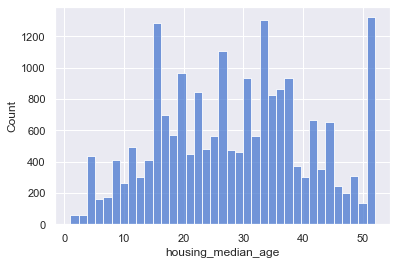

In [15]:
# we append a semi-colon ; to suppress some metadata from the plot
sns.histplot(housing_data['housing_median_age'], kde=False);

From this plot we can see a few of the values that we previously calculated. For example we see that the maximum value of housing age is about 50 years and that the most frequent value is around 30 years. Curiously, there is a _second peak_ around 15 years - why might that be the case? Asking these types of questions is often the first step in any exploratory data analysis.

---

#### Exercise #1

Create a histogram of the `median_income` attribute. Does it look like it was expressed in US dollars? What do you think might explain the possible range of values in the data?

---

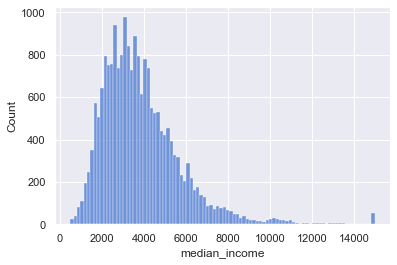

In [24]:
df = housing_data; df.head(1)
fig = sns.histplot(df["median_income"] * 1000)

#the values are probably in thousands UDS per Month.
#The range can be explained with different types of houses. For example luxurios houses etc


### Correlation matrix heatmap

To create the heatmap, we first need to calculate the correlation matrix of our numerical columns.

In [26]:
correlation_matrix = housing_data.corr()

We can examine why attributes correlate most strongly with the median house value, which will be the quantity we wish to predict when we start building models:

In [21]:
correlation_matrix['median_house_value'].sort_values(ascending=False)

median_house_value    1.000000
median_income         0.688075
total_rooms           0.134153
housing_median_age    0.105623
households            0.065843
total_bedrooms        0.049686
population           -0.024650
longitude            -0.045967
latitude             -0.144160
Name: median_house_value, dtype: float64

---

#### Exercise #2

* Which attribute is the most promising to predict the median house value?
* How can you interpret the small negative correlation between the latitude and the median house value?

---

In [ ]:
#The medain income. It has a correlation of 0.688
#That they coorleate in the oppiste direction. Speaking: The higher the median_house_value, the lower the population, lon or lat gets

Let's now build our heatmap! By default, seaborn shows strong positive correlations in lighter shades:

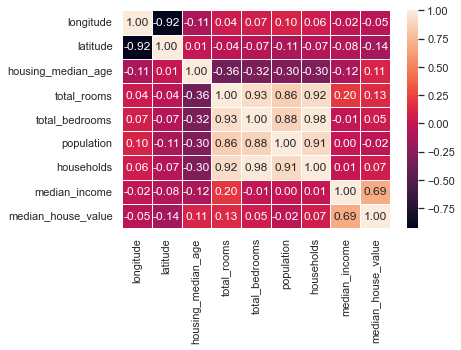

In [27]:
sns.heatmap(correlation_matrix, annot=True, fmt='.2f', linewidths=1);

**bold text**---
**You should know**

Whenever you hear the word "correlation", most people are usually referring to the [_standard correlation coefficient_](https://en.wikipedia.org/wiki/Pearson_correlation_coefficient) $\rho_{X,Y}$ (also called _Pearson's r_) between a pair of random variables $X$ and $Y$: 

$$ \rho_{X,Y} = \frac{\mathrm{cov}(X,Y)}{\sigma_X\sigma_Y}$$

where $\sigma_{X,Y}$ is the standard deviation of $X,Y$ and $\mathrm{cov}$ is the covariance. This coefficient ranges from -1 to 1; when it is close to 1 (-1) it means there is a strong positive (negative) correlation. When the coefficient is close to 0 it means there is no linear correlation. [This figure](https://en.wikipedia.org/wiki/Pearson_correlation_coefficient#/media/File:Correlation_examples2.svg) shows various plots along with the correlation coefficient between their horizontal and vertical axes.

---

### Scatter plots

*Finally*, another way to check for correlations is to examine the scatter plots of each numeric column. This can be useful for detecting _non-linear_ correlations which might be missed in the analysis above. Seaborn provides a handy `seaborn.pairplot` function that allows us to quicky see the relationships between the numeric data:

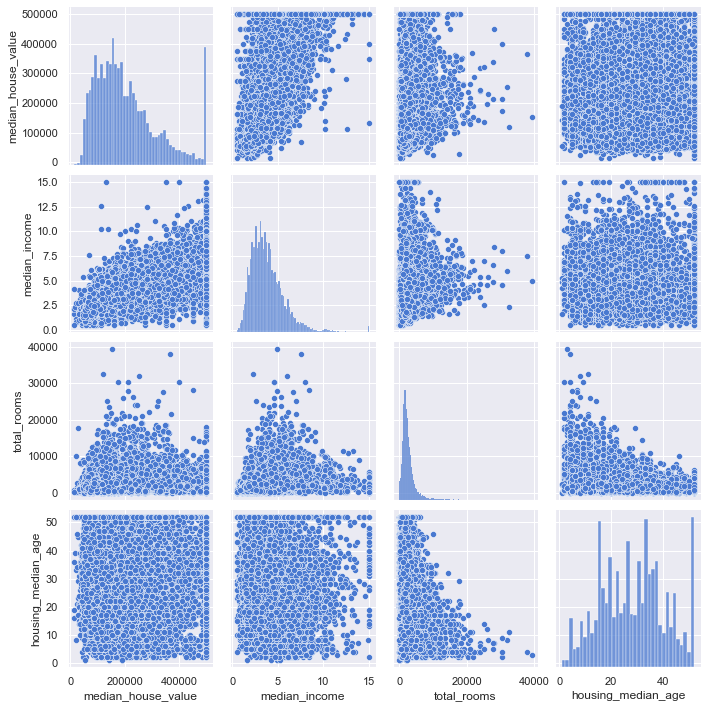

In [28]:
attributes = ["median_house_value", "median_income", "total_rooms", "housing_median_age"]
sns.pairplot(housing_data[attributes].dropna());

In many cases, a scatter plot can be too dense to interpret because there are many overlapping points. For such scenarios, two-dimensional histograms, such as _hexagon bin plots_, are very useful since they bin the spatial area of the chart and the intensity of a hexagon's color can be interpreted as points being more concentrated in this area. Let's make such a plot for the `median_income` and `median_house_value` variables using the `seaborn.jointplot` function:

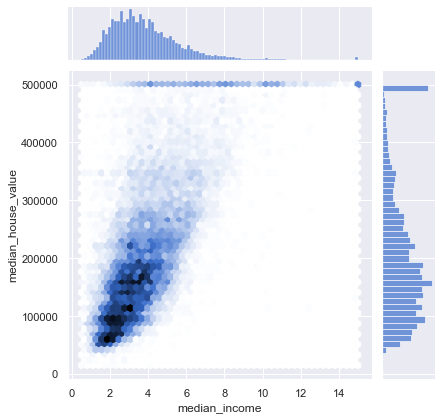

In [31]:
sns.jointplot(x='median_income', y='median_house_value', data=housing_data, kind='hex');

---

#### Exercise #3

Why do you think we see a horizontal line at around $500,000?

#### Exercise #4

Visit the seaborn [website](https://seaborn.pydata.org/) and explore the available plotting functions and apply them to attributes in the housing dataset.

---

### Ex3:
There are a lot of values from the column median_house_value, which sit at 500'000. This means we get a line, at that point on the y axis, which then shows the correlation of the these datapoints

### Ex4:
see below

In [33]:
df.head()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity
0,-122.23,37.88,41.0,880.0,129.0,322.0,126.0,8.3252,452600.0,NEAR BAY
1,-122.22,37.86,21.0,7099.0,1106.0,2401.0,1138.0,8.3014,358500.0,NEAR BAY
2,-122.24,37.85,52.0,1467.0,190.0,496.0,177.0,7.2574,352100.0,NEAR BAY
3,-122.25,37.85,52.0,1274.0,235.0,558.0,219.0,5.6431,341300.0,NEAR BAY
4,-122.25,37.85,52.0,1627.0,280.0,565.0,259.0,3.8462,342200.0,NEAR BAY


<AxesSubplot:xlabel='median_house_value', ylabel='median_income'>

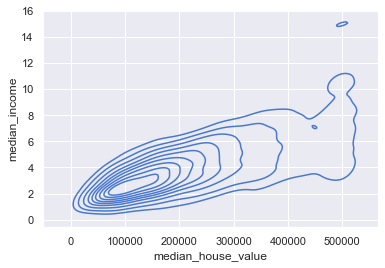

In [37]:
sns.kdeplot(x = df["median_house_value"], y = df["median_income"])

In [50]:
fig, axs = plt.subplots(1,2, figsize = (8,4), gridspec_kw=dict(width_ratios=[4, 3]))
sns.scatterplot(data = df, x = "population", y = "households", hue = "median_income", ax = axs[0])
sns.histplot(data = df, x = "total_rooms", y = "households", hue = "median_income", ax = axs[1])
fig.tight_layout()